In [2]:
import numpy as np

In [61]:
def get_bools(a, i):
    b = i // 8
    o = i % 8
    mask = 1 << o
    return (a[b] & mask) != 0

def get_bits(a, i):
    b = i // 8
    o = i % 8
    mask = 1 << o
    return a[b] & mask

def set_bits(a, i):
    b = i // 8
    o = i % 8
    mask = 1 << o
    a[b] |= mask
    
    


In [30]:
arr = np.random.randint(256, size=(1000000//8,)).astype(np.uint8)
arr[[i * 10 for i in range(50)]]

array([ 78, 247, 158,  71, 167,  34, 221,  19, 132, 140,  94,  66, 141,
       246, 131,  51, 158, 145,  54,  82, 133, 247, 129,  88, 201, 216,
        62, 181,  68, 149,   1, 171, 159, 159, 231, 183,  65,  38,  37,
       188, 177,  60,   4,  83, 220, 128,  36,   7,  62, 161], dtype=uint8)

In [51]:
idx = np.random.randint(1000000, size=(1000,))
idx

array([465922, 488189, 749907, 979399, 348551,  45274, 384688, 683187,
       557693, 266894, 782363, 266967, 770250, 142889, 847460, 611328,
       886274,   3730, 292469, 623931, 745116, 575460, 413482, 884081,
       483838, 513857, 967509, 984033, 395993, 391364, 597190,  54282,
       179301, 620652, 436787, 983608,  27398, 896836, 947060, 951763,
        10328, 995238, 356507, 373072,    286,  95453, 450346, 405838,
       435940, 314270, 127467, 143386, 327625, 100463, 680523, 370145,
       497755, 487010, 539356, 621266, 409474, 118310, 730681,  79174,
       225598, 671335,  36989,  41403, 195784, 916823, 746301, 365636,
        51991, 528975, 689427, 129196, 126927, 696353, 365620, 157192,
        55995,  57939, 998630,  77233, 466317, 176692, 739764, 740872,
       973032, 965816, 219990, 908290, 204489, 312041, 586297, 586825,
       765797, 596633, 655532, 695899,  13032, 378366, 799110, 349843,
       798596, 984235,  55736, 965737, 962708, 756226, 484980, 451732,
      

In [50]:
%timeit get_bools(a, idx)

48.3 µs ± 980 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [71]:
zarr = np.zeros(256//8, dtype=np.int8)
zarr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int8)

In [90]:
bit_idxs = np.random.randint(256, size=(100,))
bit_idxs.sort()
print(bit_idxs)

[  0   7   8  17  22  24  26  27  32  33  34  39  41  43  45  48  52  52
  56  57  60  62  64  64  65  71  74  74  77  78  79  84  85  85  88  88
  89  93  94  95  96 104 104 108 110 111 113 113 114 115 121 122 123 124
 128 135 139 142 149 159 161 163 164 165 172 176 176 177 177 177 178 180
 181 186 188 195 196 198 204 207 212 213 215 216 219 220 230 230 233 235
 236 239 242 245 247 249 250 251 251 253]


In [70]:
28639//8

3579

In [91]:
set_bits(zarr, bit_idxs)
np.where(zarr > 0)

(array([ 2,  3,  7, 12, 14, 18, 20, 28, 31], dtype=int64),)

In [92]:
np.unpackbits(zarr.view(np.uint8))

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0], dtype=uint8)

In [107]:
bits = np.zeros(1000000, dtype=np.bool)


In [108]:
bit_idxs = np.random.randint(len(bits), size=(100,))
bit_idxs.sort()
print(bit_idxs)

[  9622  17784  36498  41539  50968  53648  58835  61644  63450  73759
  81871 132600 137292 150886 158336 176048 181865 199344 199779 211018
 219694 221349 266199 271549 282833 294165 297181 297207 301020 301172
 320581 356764 372017 373915 374971 377952 387655 395021 404132 404560
 404594 414888 429128 450008 450297 452748 469166 483262 504711 510335
 519911 527148 532439 532672 550421 553603 568842 575699 583792 585201
 596065 623552 626438 634698 640003 669382 675344 677379 687739 688392
 695434 701067 730578 757990 773160 790419 815007 816158 836693 836770
 842301 842642 845347 846497 872547 875811 883564 887647 902485 903283
 903746 905082 912902 918690 923603 942255 966364 975038 977978 995095]


In [113]:
bits[bit_idxs]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

## Draw BitBar

### Draw Rectangles in matplotlib

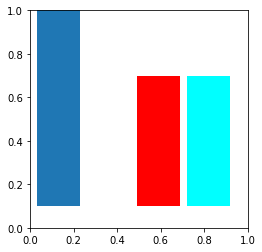

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig6 = plt.figure()
ax6 = fig6.add_subplot(111, aspect='equal')
for p in [
    patches.Rectangle(
        (0.03, 0.1), 0.2, 0.99,
        facecolor=None      # Default
    ),
    patches.Rectangle(
        (0.26, 0.1), 0.2, 0.6,
        facecolor="none"     # No background
    ),
    patches.Rectangle(
        (0.49, 0.1), 0.2, 0.6,
        facecolor="red"
    ),
    patches.Rectangle(
        (0.72, 0.1), 0.2, 0.6,
        facecolor="#00ffff"
    ), 
]:
    ax6.add_patch(p)

plt.show()

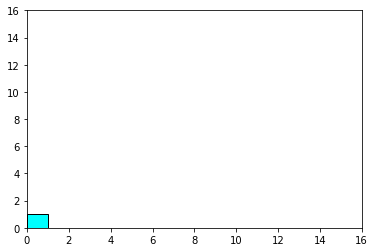

In [11]:
from random import randint, choice
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

back_color = "black"
colors     = ['red', 'green', 'cyan', 'yellow']

width, height = 16, 16

fig, ax = plt.subplots()
ax.set(xlim=[0, width], ylim=[0, height]) # Or use "ax.axis([x0,x1,y0,y1])"

rect = mpatches.Rectangle(
    (0, 0), 1, 1,
    facecolor = choice(colors),
    edgecolor = back_color
)
ax.add_artist(rect)

# Be sure to draw the canvas once before we start blitting. Otherwise
# a) the renderer doesn't exist yet, and b) there's noting to blit onto
fig.canvas.draw()

def update():
    x = randint(0, width - 1)
    y = randint(0, height - 1)
    rect.set(xy=[x,y], facecolor=choice(colors))

    start = time.time()
    ax.draw_artist(rect)
    fig.canvas.blit(ax.bbox)
    print("draw >>>", time.time() - start)

timer = fig.canvas.new_timer(interval=1)
timer.add_callback(update)

### Draw by ipythonblocks

In [15]:
from ipythonblocks import BlockGrid
import numpy as np

In [11]:
grid = BlockGrid(256, 1, fill=(123, 234, 123))
grid.show()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [186]:
%%time

bits = np.zeros(256, dtype=np.bool)
true_bits = np.random.randint(len(bits), size=(8,))
bits[true_bits] = True
bit_grid = BlockGrid(len(bits), 1, fill=(17, 41, 129))
for block in range(bit_grid.width):
    color = bit_grid[0, block]
    if bits[block]:
        bit_grid[0, block] = (244, 195, 173)

bit_grid.lines_on = False
bit_grid.show()
bit_grid.show()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Wall time: 21 ms
